In [1]:
# Import ptlflow and some dependencies for the example
import ptlflow
import cv2

/home/puff/anaconda3/envs/ptltflow/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# from PIL import Image
from PIL import Image as PILImage
from IPython.display import Image, display

In [3]:
frame_1_path = 'Images/frame_1.jpg'
frame_2_path = 'Images/frame_1.jpg'

frame_1_path = 'Images/bw_1.jpg'
frame_2_path = 'Images/bw_2.jpg'


frame_1 = cv2.imread(frame_1_path)
frame_2 = cv2.imread(frame_2_path)

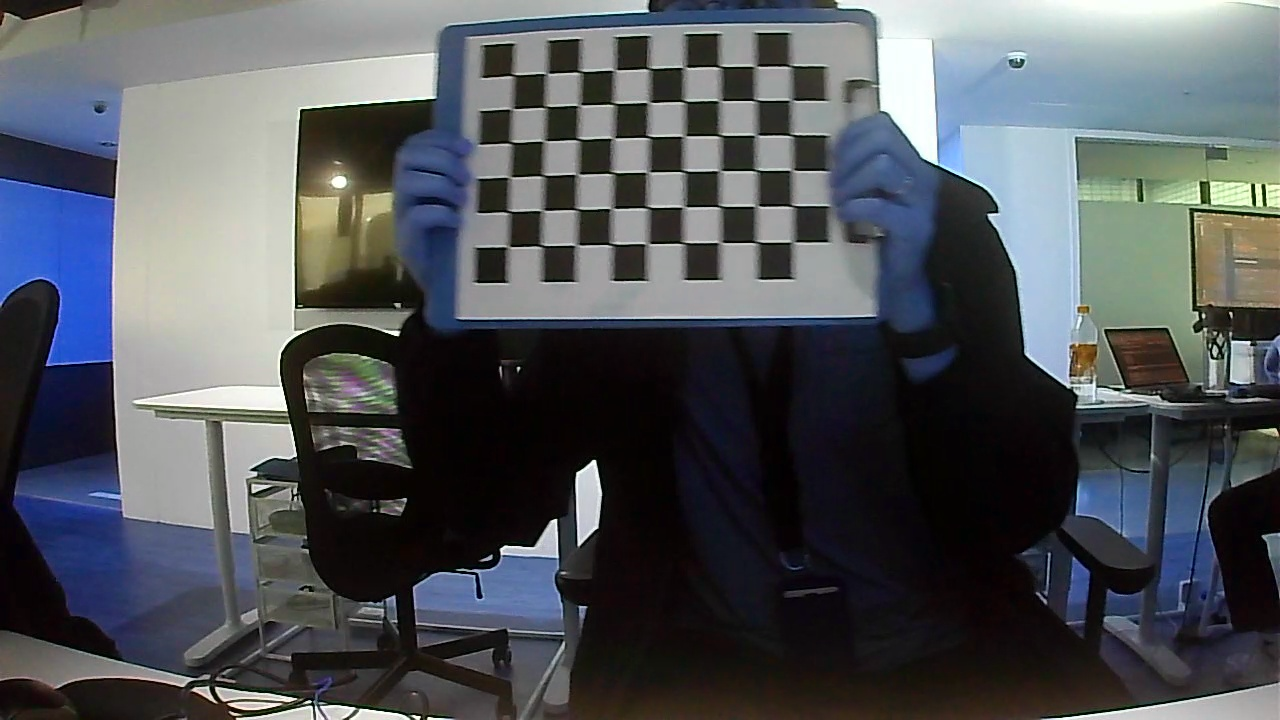

In [4]:
display(PILImage.fromarray(frame_1))

In [5]:
# Additional dependencies for this example
from ptlflow.utils.io_adapter import IOAdapter
from ptlflow.utils import flow_utils

In [6]:
model = ptlflow.get_model('raft_small', 'things')
model.eval()

io_adapter = IOAdapter(model, frame_1.shape[:2])
inputs = io_adapter.prepare_inputs([frame_1, frame_2])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


/home/puff/anaconda3/envs/ptltflow/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


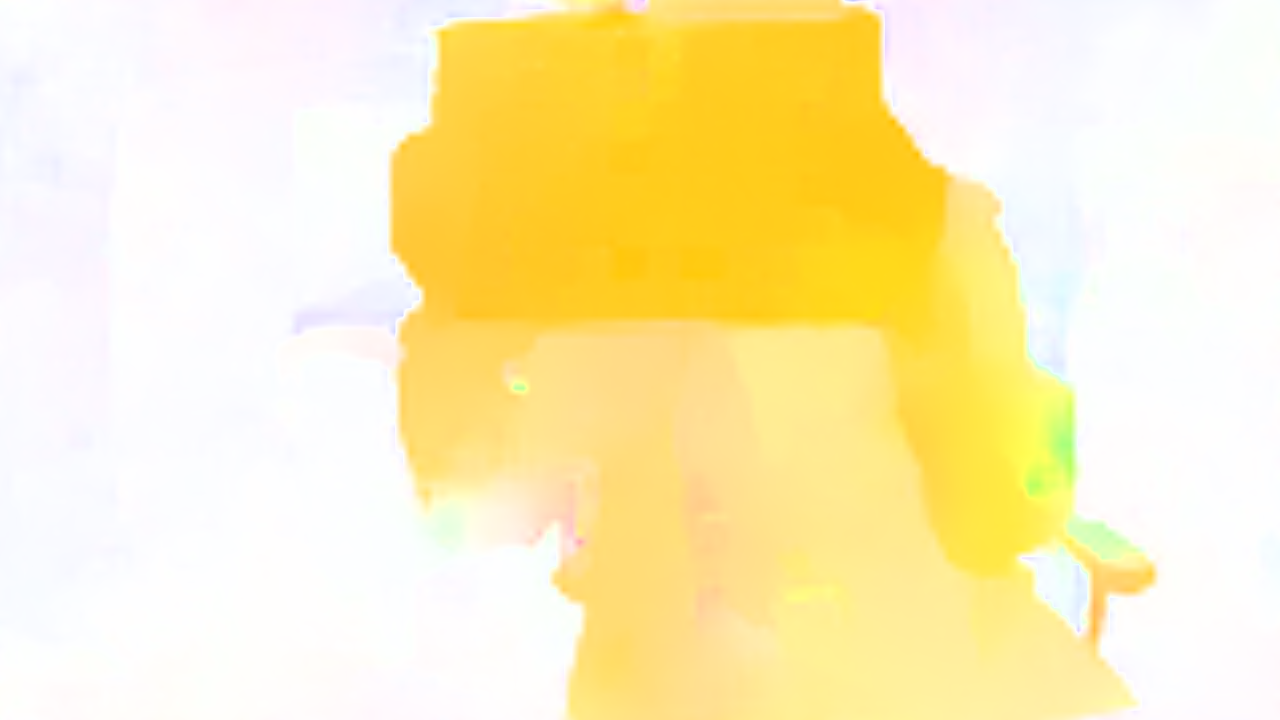

In [7]:
%time
# Forward the inputs to obtain the model predictions
predictions = model(inputs)

# Some padding may have been added during prepare_inputs. The line below ensures that the padding is removed
# to make the predictions have the same size as the original images.
predictions = io_adapter.unpad_and_unscale(predictions)

# Visualize the predicted flow
flow = predictions['flows'][0, 0]  # Remove batch and sequence dimensions
flow = flow.permute(1, 2, 0)  # change from CHW to HWC shape
flow = flow.detach().numpy()
flow_viz = flow_utils.flow_to_rgb(flow)  # Represent the flow as RGB colors
flow_viz = cv2.cvtColor(flow_viz, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR format

display(PILImage.fromarray(flow_viz))